<a href="https://colab.research.google.com/github/yanxiliu37/CITS4012_Labs/blob/main/%E2%80%9CCITS4012_Lab01_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 01

# PyTorch

[PyTorch](https://pytorch.org/) is an open source machine learning library used for applications such as natural language processing and computer vision. It is based on the [Torch](http://torch.ch/) library.

Before we use Pytorch it is (obviously) neccessary to understand what Pytorch is. Let's start from the two core concepts: **Tensor**, **(Computational) Graph** and **Automatic Differentiation**


## Tensor
A tensor is a generalization of vectors and matrices to potentially higher dimensions. It is the primary data structure used by neural networks. Normally, we can use **nd**-tensor to call any of its instances where **nd** stands for **n** **dimensional**.

There are three basic attributes we need to know about tensors:
*   *Rank*: The number of dimensions present within the tensor. e.g. rank-2 tensor means 2d-tensor.
*   *Axes*: Used to refer to a specific dimensions. The number of axes equals to the number of dimensions. The length of an axis represents the number of elements running along this axis.
*   *Shape*: Formed by the length of each axis. e.g. shape(1,2) means a 2d-tensor with the first axis of length 1 and the second axis of length 2.


![Tensor_Rank](https://drive.google.com/uc?id=1o5wulLHGxUuPxH3t3xfV8U7d2CrsL1oG)


A [torch.Tensor](https://pytorch.org/docs/stable/tensors.html) (tensor in PyTorch) has the following key properties :
*   *torch.dtype*: an object representing the data type of a torch.Tensor. e.g. torch.float32
*   *torch.device*: an object representing the device on which a torch.Tensor is or will be allocated. e.g. CPU or CUDA (GPU)
*   *torch.layout*: an object representing the memory layout of a torch.Tensor.

More details with illustrative examples can be found [here](https://pytorch.org/docs/stable/tensor_attributes.html#tensor-attributes-doc)




## Computational Graph and Automatic Differentiation
PyTorch uses (directed acyclic) computational graphs  to graph the functional operations that are applied to tensors inside neural networks so as to computationally calculate derivatives for the network optimization. In graphs, the nodes are Tensors while the eages are functions that produce output Tensors from input Tensors (e.g. summation, mutiplication). Those graphs enable PyTorch to do the automatic differentiation for us, i.e. it can automatically calculate the derivatives that are needed for network optimization. We will learn more about it through pratical examples in following sections.

Specifically, PyTorch generates the computational graph on the fly as when operations are created during forward passes in neural networks, which is refered as dynamic computational graph.  



## Importing PyTorch library
Google Colab has torch library installed as default so you just need to import it as below:

In [ ]:
import torch
print(torch.__version__) #check version

2.6.0+cu124


## Tensor creation
With PyTorch, we will be implementing lots of models. To get started, let's  have a look at how to create a tensor.

We can creating tensors **with numerical data**, typically numpy arrays.

In [ ]:
import numpy as np

# Scalar (0 Rank)
data = torch.tensor(1)
print(data.shape)


# Vector (1 Rank)
data = np.array([1,2])
data = torch.tensor(data)
print(data.shape)


# Matrix (2 Rank)
data = np.ones((2,2,))
data = torch.tensor(data)
print(data.shape)


# Cube (3 Rank)
data = np.ones((2,2,2))
data = torch.tensor(data)
print(data.shape)


# Vector of cubes (4 Rank)
data = np.ones((2,2,2,2))
data = torch.tensor(data)
print(data.shape)

torch.Size([])
torch.Size([2])
torch.Size([2, 2])
torch.Size([2, 2, 2])
torch.Size([2, 2, 2, 2])


In [ ]:
data = np.array([1,2])
print(data.dtype)

data_T = torch.tensor(data)
print(data_T)
print(data_T.dtype)
print(data_T.dtype==torch.get_default_dtype()) #get the torch default data type,

#which can also be changed through 'torch.set_default_dtype(dtype)'
print()

data_t = torch.tensor(data)
print(data_t)
print(data_t.dtype)
print()

#we can also specify a datatype with torch.tensor()
data_t = torch.tensor(data, dtype=torch.float64)
print(data_t)
print(data_t.dtype)

int64
tensor([1, 2])
torch.int64
False

tensor([1, 2])
torch.int64

tensor([1., 2.], dtype=torch.float64)
torch.float64


As well as torch.tensor(), we can also use torch.as_tensor and torch.from_numpy

In [ ]:
# Create tensor using torch.as_tensor
data = np.ones((2,2,2))
data = torch.as_tensor(data)
print(data.shape)

# Create tensor using torch.from_numpy
data = np.ones((2,2,2,2))
data = torch.from_numpy(data)
print(data.shape)

torch.Size([2, 2, 2])
torch.Size([2, 2, 2, 2])


Alternatively, we can also create tensors **without data** using factory functions

In [ ]:
# torch.eye: Returns an identity matrix
torch.eye(2)

tensor([[1., 0.],
        [0., 1.]])

In [ ]:
# torch.zeros: Returns a tensor of given shape filled with all zeros
torch.zeros(2,2)

tensor([[0., 0.],
        [0., 0.]])

In [ ]:
# torch.ones: Returns a tensor of given shape filled with all ones
torch.ones(2,2)

tensor([[1., 1.],
        [1., 1.]])

In [ ]:
# torch.rand: Returns a tensor of given shape filled with values drawn from a uniform distribution on [0, 1).
torch.rand(2,2)

tensor([[0.9600, 0.3434],
        [0.2133, 0.6312]])

More factory functions for tensor creation can be found [here](https://pytorch.org/cppdocs/notes/tensor_creation.html#factory-functions)

## Basic tensor operations

The list of operations with examples can be found [here](https://pytorch.org/docs/stable/torch.html#math-operations). Please go through and try to practise yourself with examples before you move on. You don't need to remember all of them, you can easily refer back when needed.

## Simple Linear Regression

![Linear_Regression](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/320px-Linear_regression.svg.png)

The following code implements a simple linear regression algorithm.



### Linear Regression from scratch

Prepare data

In [ ]:
import numpy
import matplotlib.pyplot as plt
import torch

# training data
x_training = numpy.asarray([1,2,5,8,9,12,14,16,18,20])
y_training = numpy.asarray([1500,3500,7200,11000,12500,18500,22000,24500,28000,30500])

x_test = numpy.asarray([3,7,13,15,19])
y_test = numpy.asarray([4400,10000,19500,23500,29000])

# creating tensors for training from training data
x_data = torch.from_numpy(x_training)
y_data = torch.from_numpy(y_training)
x_test_data = torch.from_numpy(x_test)
y_test_data = torch.from_numpy(y_test)


 Once the dataset is prepared, we can start defining our model architecture

 Let's first build it from scratch so as to gain a clear understanding about how the automatic differentiation works



In [ ]:
# Define weights and biases
weight = torch.tensor(numpy.random.randn(), requires_grad=True)
bias = torch.tensor(numpy.random.randn(), requires_grad=True)
print(weight)
print(bias)

tensor(-1.1378, requires_grad=True)
tensor(-0.2142, requires_grad=True)


Note that we set 'requires_grad=True' above, which turns on the automatic gradient computation for weight and bias.

Every Tensor has a flag: 'requires_grad' that allows for fine grained exclusion of subgraphs from gradient computation and can increase efficiency. If there’s a single input to an operation that requires gradient, its output will also require gradient. Conversely, the output won’t require gradient only if all inputs don’t require gradient. Backward computation is not performed in the subgraphs where all Tensors don’t require gradients.

In [ ]:
# Define the model
# Hypothesis = W * X + b (Linear Model)
def linearRegression(x):
  return x * weight + bias

In [ ]:
# Generate predictions and compare with ground truth labels
# As we can see, we randomly initialise the weight and bias, the model does not predict properly at the moment
predictions = linearRegression(x_data)
print(predictions)
print(y_data)

tensor([ -1.3520,  -2.4897,  -5.9031,  -9.3164, -10.4542, -13.8675, -16.1430,
        -18.4186, -20.6941, -22.9697], grad_fn=<AddBackward0>)
tensor([ 1500,  3500,  7200, 11000, 12500, 18500, 22000, 24500, 28000, 30500])


In [ ]:
# Define loss function
# here we use mean squared error (MSE)
def mse(x1, x2):
  diff = x1 - x2
  return torch.sum(diff*diff)/diff.numel()

In [ ]:
# Compute loss
# As we all know, the lower, the better
loss = mse(predictions, y_data)
print(loss)

tensor(3.4896e+08, grad_fn=<DivBackward0>)


As is mentioned, PyTorch automatically computes the gradient/derivative of the loss (with regard to the weight and bias here). This was enabled when we set 'requires_grad=True'.

All we need to do now is to call the backward() function over our loss, which will trigger the automatic computation of gradients based on the chain rule.

In [ ]:
# Compute gradients
loss.backward()

After the backward pass, the gradients are stored in the .grad property of the involved tensors. Let's have a look.

In [ ]:
# Gradient for weight
print(weight)
print(weight.grad)
print()

# Gradient for bias
print(bias)
print(bias.grad)

tensor(-1.1378, requires_grad=True)
tensor(-456544.6875)

tensor(-0.2142, requires_grad=True)
tensor(-31864.3223)


Now we can easily adjust the weight and bias using the gradients.

We need to reset the gradients before the next forward pass, because PyTorch accumulates gradients.

In [ ]:
# We do not want gradient for the update operation
# There will not be automatic gradient computation within the torch.no_grad()
# We use learning rate of 1e-5 here

with torch.no_grad():
  weight -= weight.grad * 1e-5
  bias -= bias.grad * 1e-5
  # remember to reset the gradients
  weight.grad.zero_()
  bias.grad.zero_()
print(weight)
print(bias)


tensor(3.4277, requires_grad=True)
tensor(0.1044, requires_grad=True)


In [ ]:
print(weight.grad)
print(bias.grad)

tensor(0.)
tensor(0.)


Let's predict and compute loss again. The loss should be lower with new weights and biases

In [ ]:
predictions = linearRegression(x_data)
loss = mse(predictions, y_data)
print(loss)

tensor(3.4687e+08, grad_fn=<DivBackward0>)


Hope you now have an initial clear understanding of how automatic gradient computing works.

Let's start training the model for multiple epochs.

We can just simply create a python loop to do it.

Epoch: 0000 loss= 344789952.00000000 W= 7.9794 b= 0.4221
Epoch: 0200 loss= 103767032.00000000 W= 690.9492 b= 47.9605
Epoch: 0400 loss= 31441740.00000000 W= 1065.0907 b= 73.7712
Epoch: 0600 loss= 9738590.00000000 W= 1270.0582 b= 87.6798
Epoch: 0800 loss= 3225893.25000000 W= 1382.3538 b= 95.0689
Epoch: 1000 loss= 1271469.62500000 W= 1443.8851 b= 98.8868
Epoch: 1200 loss= 684903.18750000 W= 1477.6077 b= 100.7487
Epoch: 1400 loss= 508793.09375000 W= 1496.0973 b= 101.5394
Epoch: 1600 loss= 455859.65625000 W= 1506.2412 b= 101.7435
Epoch: 1800 loss= 439883.90625000 W= 1511.8147 b= 101.6264
Epoch: 2000 loss= 435001.31250000 W= 1514.8837 b= 101.3338
Epoch: 2200 loss= 433446.34375000 W= 1516.5807 b= 100.9451
Epoch: 2400 loss= 432889.68750000 W= 1517.5266 b= 100.5042
Epoch: 2600 loss= 432633.75000000 W= 1518.0605 b= 100.0347
Epoch: 2800 loss= 432467.25000000 W= 1518.3690 b= 99.5500
Epoch: 3000 loss= 432329.09375000 W= 1518.5533 b= 99.0571
Epoch: 3200 loss= 432198.09375000 W= 1518.6702 b= 98.5601


/tmp/ipython-input-20-2233321254.py:28: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  plt.plot(x_training, weight.data * x_training + bias.data, label='Linear')


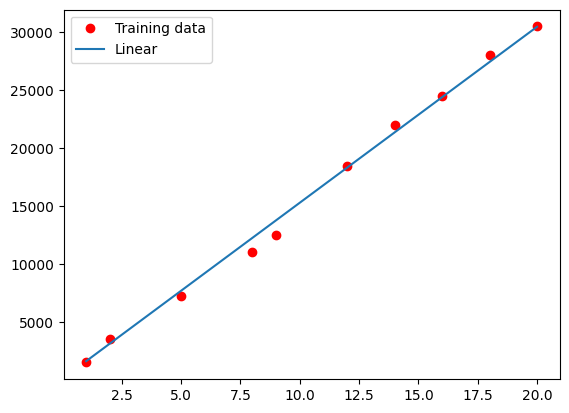

Testing loss= 219117.328125000
Absolute mean square loss difference: 211948.078125000


/tmp/ipython-input-20-2233321254.py:40: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  plt.plot(x_test, weight.data * x_test + bias.data, label='Linear')


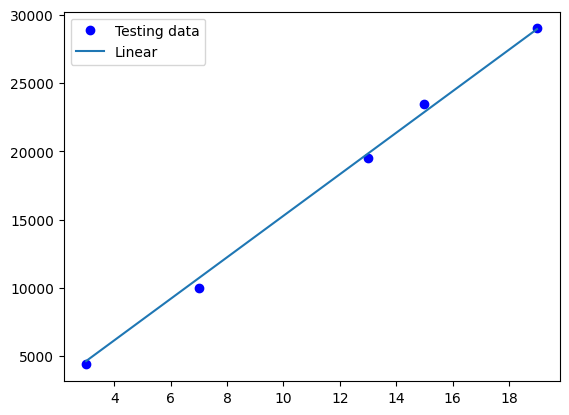

In [ ]:
# An epoch is one iteration over the entire input data
no_of_epochs = 5000
# How often you want to display training info.
display_interval = 200

for epoch in range(no_of_epochs):
  predictions = linearRegression(x_data)
  loss = mse(predictions, y_data)
  loss.backward()
  with torch.no_grad():
    weight -= weight.grad * 1e-5
    bias -= bias.grad * 1e-5
    weight.grad.zero_()
    bias.grad.zero_()
  if epoch % display_interval == 0 :
      # calculate the cost of the current model
      predictions = linearRegression(x_data)
      loss = mse(predictions, y_data)
      print("Epoch:", '%04d' %(epoch), "loss=", "{:.8f}".format(loss), "W=", "{:.4f}".format(weight), "b=",  "{:.4f}".format(bias))

print("=========================================================")
training_loss = mse(linearRegression(x_data), y_data)
print("Optimised:", "loss=", "{:.9f}".format(training_loss.data), \
              "W=", "{:.9f}".format(weight.data), "b=", "{:.9f}".format(bias.data))

# Plot training data on the graph
plt.plot(x_training, y_training, 'ro', label='Training data')
plt.plot(x_training, weight.data * x_training + bias.data, label='Linear')
plt.legend()
plt.show()

# Calculate testing loss
testing_loss = mse(linearRegression(x_test_data), y_test_data)
print("Testing loss=", "{:.9f}".format(testing_loss.data))
print("Absolute mean square loss difference:", "{:.9f}".format(abs(
      training_loss.data - testing_loss.data)))

# Plot testing data on the graph
plt.plot(x_test, y_test, 'bo', label='Testing data')
plt.plot(x_test, weight.data * x_test + bias.data, label='Linear')
plt.legend()
plt.show()

### Linear Regression using PyTorch built-ins

Prepare data

In [ ]:
import numpy
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# training data: this time we use 2d array
# Assuming we have 90 samples of 10 features about a house condition, such as bedroom number, distance to city center etc.
# and will predict the house price
x_data = torch.randn(90, 10)
y_data = torch.randn(90, 1)

# testing data:
x_test_data = torch.randn(10, 10)
y_test_data = torch.randn(10, 1)

This time we don't need to initialize the weight and bias manually. Instead, we will define the model using the built-in [torch.nn.Linear](https://docs.pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear).

[**torch.nn**](https://pytorch.org/docs/stable/nn.html) is a subpackage that contains modules and extensible classes for us to build neural networks.



In [ ]:
# Define model
linearRegression =  nn.Linear(10,1)
print(linearRegression.weight)
print(linearRegression.bias)

Parameter containing:
tensor([[ 0.0176,  0.2117, -0.0476, -0.1178,  0.0463,  0.2404, -0.0278,  0.2138,
          0.1969, -0.0591]], requires_grad=True)
Parameter containing:
tensor([0.1676], requires_grad=True)


Similarly, we don't manually update the weight and bias using gradients by ourselves. Instead, we will use the optimizer optim.SGD.

[**torch.optim**](https://pytorch.org/docs/stable/optim.html) is a subpackage that contains the standard optimization operations like Adam and SGD.



In [ ]:
# Define optimizer
# Just pass the model parameters to be updated and specify the learning rate when calling optim.SGD
# SGD optimizer in PyTorch actually is Mini-batch Gradient Descent with momentum.
# In this case, as the batch size of our model is N, SGD here is actually Batch Gradient Descent.
optimizer = torch.optim.SGD(linearRegression.parameters(), lr=1e-5)

Again, we use the built-in loss function mse_loss instead of defining it manually.

We will need the [**torch.nn.functional**](https://pytorch.org/docs/stable/nn.functional.html) interface, which contains typical operations used for building neural networks such as convolution operations, activation functions and loss functions we need here.

In [ ]:
# Import nn.functional
import torch.nn.functional as F

# Define the loss function
loss_func = F.mse_loss

# Calculate loss
loss = loss_func(linearRegression(x_data), y_data)
print(loss)

tensor(0.9412, grad_fn=<MseLossBackward0>)


Train the model

In [ ]:
# An epoch is one iteration over the entire input data
no_of_epochs = 5000
# How often you want to display training info.
display_interval = 200

for epoch in range(no_of_epochs):
  predictions = linearRegression(x_data)
  loss = loss_func(predictions, y_data)
  loss.backward()
  optimizer.step() #call step() to automatically update the parameters through our defined optimizer, which can be called once after backward()
  optimizer.zero_grad() #reset the gradient as what we did before
  if epoch % display_interval == 0 :
      # calculate the cost of the current model
      predictions = linearRegression(x_data)
      loss = loss_func(predictions, y_data)
      print("Epoch:", '%04d' % (epoch), "loss=", "{:.8f}".format(loss))

print("=========================================================")
training_loss = mse(linearRegression(x_data), y_data)
print("Optimised:", "loss=", "{:.9f}".format(training_loss.data))


# Calculate testing loss
testing_loss = loss_func(linearRegression(x_test_data), y_test_data)
print("Testing loss=", "{:.9f}".format(testing_loss.data))
print("Absolute mean square loss difference:", "{:.9f}".format(abs(
      training_loss.data - testing_loss.data)))

Epoch: 0000 loss= 0.94122899
Epoch: 0200 loss= 0.93933594
Epoch: 0400 loss= 0.93746060
Epoch: 0600 loss= 0.93560302
Epoch: 0800 loss= 0.93376285
Epoch: 1000 loss= 0.93194020
Epoch: 1200 loss= 0.93013483
Epoch: 1400 loss= 0.92834628
Epoch: 1600 loss= 0.92657465
Epoch: 1800 loss= 0.92481977
Epoch: 2000 loss= 0.92308122
Epoch: 2200 loss= 0.92135924
Epoch: 2400 loss= 0.91965330
Epoch: 2600 loss= 0.91796356
Epoch: 2800 loss= 0.91628933
Epoch: 3000 loss= 0.91463113
Epoch: 3200 loss= 0.91298842
Epoch: 3400 loss= 0.91136086
Epoch: 3600 loss= 0.90974891
Epoch: 3800 loss= 0.90815198
Epoch: 4000 loss= 0.90656966
Epoch: 4200 loss= 0.90500236
Epoch: 4400 loss= 0.90344965
Epoch: 4600 loss= 0.90191162
Epoch: 4800 loss= 0.90038788
Optimised: loss= 0.898885608
Testing loss= 1.332464814
Absolute mean square loss difference: 0.433579206


# NLTK Library and WordNet

WordNet® is a large lexical database of English. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets), each expressing a distinct concept.

In Python, NLTK library includes English WordNet.

**To use wordnet, you need to download the wordnet data via NLTK library**

 * **[NLTK](https://www.nltk.org/)** is a **N**atural **L**anguage **T**ool**k**iit for python.

In [ ]:
import nltk

## WordNet

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.corpus import wordnet as wn

Let's look up a word using `synsets()`. This function has an optional pos argument which lets you constain the part of speech of the word. These parts of speech could be `NOUN`, `ADJ`, `ADV`, `VERB`.

Synset is a set of synonyms that share a common meaning.



In [ ]:
# all synsets for word 'dog':
wn.synsets('dogs')

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01'),
 Synset('chase.v.01')]

In [ ]:
wn.synsets('dog', pos=wn.NOUN)

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01')]

In [ ]:
wn.synsets('dog', pos=wn.VERB)

[Synset('chase.v.01')]

Synset instances are the groupings of synonymous words that express the same concept. A synset string input (e.g., dog.n.01) is identified with a 3-part name that consists of the following parts:


*   `<lemma>` is the word’s morphological stem
*   `<pos>` is one of the module attributes ADJ, ADJ_SAT, ADV, NOUN or VERB
*   `<number>` is the sense number, counting from 0







In [ ]:
dog = wn.synset('dog.n.01')
person = wn.synset('person.n.01')
cat = wn.synset('cat.n.01')
computer = wn.synset('computer.n.01')

To get the definition of a synset, we can utilize the `definition()` function, which can further analyze the synset for a common definition to all of its lemmas.

In [ ]:
dog.definition()

'a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds'

In [ ]:
person.definition()

'a human being'

In [ ]:
cat.definition()

'feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats'

In [ ]:
computer.definition()

'a machine for performing calculations automatically'

Each synset has list of lemmas, which are all the words specified in this synset. We can use the `lemma_names()` method to get all lemmas of the synset.

In [ ]:
dog.lemma_names()

['dog', 'domestic_dog', 'Canis_familiaris']

In [ ]:
person.lemma_names()

['person', 'individual', 'someone', 'somebody', 'mortal', 'soul']

In [ ]:
cat.lemma_names()

['cat', 'true_cat']

In [ ]:
computer.lemma_names()

['computer',
 'computing_machine',
 'computing_device',
 'data_processor',
 'electronic_computer',
 'information_processing_system']

### path_similarity()
path_similarity() returns a score denoting how similar two word senses are, based on the shortest path that connects the senses in the is-a (hypernym/hypnoym) taxonomy. The score is in the range 0 to 1.

In [ ]:
print("dog<->cat : ", wn.path_similarity(dog,cat))
print("person<->cat : ", wn.path_similarity(person,cat))
print("person<->dog : ", wn.path_similarity(person,dog))
print("person<->computer : ", wn.path_similarity(person,computer))

dog<->cat :  0.2
person<->cat :  0.1
person<->dog :  0.2
person<->computer :  0.1111111111111111


### Wu-Palmer Similarity (wup_similarity() )
wup_similarity() returns a score denoting how similar two word senses are, based on the depth of the two senses in the taxonomy and that of their Least Common Subsumer (most specific ancestor node).

In [ ]:
print("dog<->cat : ", wn.wup_similarity(dog,cat))
print("person<->cat : ", wn.wup_similarity(person,cat))
print("person<->dog : ", wn.wup_similarity(person,dog))
print("person<->computer : ", wn.wup_similarity(person,computer))

dog<->cat :  0.8571428571428571
person<->cat :  0.5714285714285714
person<->dog :  0.75
person<->computer :  0.5


# TFIDF (Term Frequency Inverse Document Frequency)

TFIDF is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.


**Tokenization**

In [ ]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize, sent_tokenize

import re
import numpy as np

nltk.download('stopwords')
from nltk.corpus import stopwords as sw


corpus = [
    'I love Natural Language Processing. I have NLP lab on Tuesday.', #document 1
    'NLP is the abbreviation for Natural Language Processing.' #document 2
]

# Tokenize sentences - for only doc1
tokenized_sentence = sent_tokenize(corpus[0])
print("\ntokenized_sentence: ")
print(tokenized_sentence)

# Remove punctuations - for only doc1
clean_doc1 = re.sub(r'[^\w\s]','',corpus[0])
print("\nclean_sentence: ")
print(clean_doc1)

# Tokenize words - for only doc1
tokenized_doc1 = word_tokenize(clean_doc1)
print("\ntokenized_word: ")
print(tokenized_doc1)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokenized_doc1]
print("\nlower_case: ")
print(lower_tokens)

# stop word removal
sww = sw.words()
tokenized_doc1 = [w for w in lower_tokens if not w in sww]
print("\ntokenized_word (in lower case, w/o stopwords): ")
print(tokenized_doc1)

# same process for doc2
clean_doc2 = re.sub(r'[^\w\s]','',corpus[1])
tokenized_doc2 = word_tokenize(clean_doc2)
lower_tokens2 = [t.lower() for t in tokenized_doc2]
tokenized_doc2 = [w for w in lower_tokens2 if not w in sww]

tokenized_docs = [tokenized_doc1, tokenized_doc2]
print("\nfinal_docs: ")
print(tokenized_docs[0])
print(tokenized_docs[1])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



tokenized_sentence: 
['I love Natural Language Processing.', 'I have NLP lab on Tuesday.']

clean_sentence: 
I love Natural Language Processing I have NLP lab on Tuesday

tokenized_word: 
['I', 'love', 'Natural', 'Language', 'Processing', 'I', 'have', 'NLP', 'lab', 'on', 'Tuesday']

lower_case: 
['i', 'love', 'natural', 'language', 'processing', 'i', 'have', 'nlp', 'lab', 'on', 'tuesday']

tokenized_word (in lower case, w/o stopwords): 
['love', 'natural', 'language', 'processing', 'nlp', 'lab', 'tuesday']

final_docs: 
['love', 'natural', 'language', 'processing', 'nlp', 'lab', 'tuesday']
['nlp', 'abbreviation', 'natural', 'language', 'processing']


**Document Frequency (DF)**

DF is the count of occurrences of term t in the document set N

*df(t) = occurrence of t in documents*

*idf(t) = log(N/(df + 1))*



In [ ]:
DF = {}

for tokenized_doc in tokenized_docs:
    # get each unique word in the doc - and count the number of occurrences in the document
    for term in np.unique(tokenized_doc):
        try:
            DF[term] +=1
        except:
            DF[term] =1

DF

{np.str_('lab'): 1,
 np.str_('language'): 2,
 np.str_('love'): 1,
 np.str_('natural'): 2,
 np.str_('nlp'): 2,
 np.str_('processing'): 2,
 np.str_('tuesday'): 1,
 np.str_('abbreviation'): 1}

In [ ]:
DF['nlp']

2

**TF-IDF calculation**

In the following sample code, we will use [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) to easily count the word occurance in a document. [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) is a Python class that enables counting for elements from an iterable.

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import math


tf_idf = {}

# total number of documents
N = len(tokenized_docs)

doc_id = 0
# get each tokenised doc
for tokenized_doc in tokenized_docs:
    # initialise counter for the doc
    counter = Counter(tokenized_doc)
    # calculate total number of words in the doc
    total_num_words = len(tokenized_doc)

    # get each unique word in the doc
    for term in np.unique(tokenized_doc):

        # calculate Term Frequency
        tf = counter[term]/total_num_words

        # calculate Document Frequency
        df = DF[term]

        # calculate Inverse Document Frequency
        idf = math.log(N/(df+1))+1

        # calculate TF-IDF
        tf_idf[doc_id, term] = tf*idf

    doc_id += 1

tf_idf

{(0, np.str_('lab')): 0.14285714285714285,
 (0, np.str_('language')): 0.08493355598454794,
 (0, np.str_('love')): 0.14285714285714285,
 (0, np.str_('natural')): 0.08493355598454794,
 (0, np.str_('nlp')): 0.08493355598454794,
 (0, np.str_('processing')): 0.08493355598454794,
 (0, np.str_('tuesday')): 0.14285714285714285,
 (1, np.str_('abbreviation')): 0.2,
 (1, np.str_('language')): 0.11890697837836713,
 (1, np.str_('natural')): 0.11890697837836713,
 (1, np.str_('nlp')): 0.11890697837836713,
 (1, np.str_('processing')): 0.11890697837836713}

**Sort by the importance - Descending Order**

We use Python built-in function [sorted](https://docs.python.org/3/howto/sorting.html) for sorting the words based on its tf_idf values.

In [ ]:
import numpy as np
#sort the dictionary based on values
dict_exmaple = tf_idf
sorted_dict = sorted(dict_exmaple.items(), key=lambda x: x[1], reverse=True)
sorted_dict

[((1, np.str_('abbreviation')), 0.2),
 ((0, np.str_('lab')), 0.14285714285714285),
 ((0, np.str_('love')), 0.14285714285714285),
 ((0, np.str_('tuesday')), 0.14285714285714285),
 ((1, np.str_('language')), 0.11890697837836713),
 ((1, np.str_('natural')), 0.11890697837836713),
 ((1, np.str_('nlp')), 0.11890697837836713),
 ((1, np.str_('processing')), 0.11890697837836713),
 ((0, np.str_('language')), 0.08493355598454794),
 ((0, np.str_('natural')), 0.08493355598454794),
 ((0, np.str_('nlp')), 0.08493355598454794),
 ((0, np.str_('processing')), 0.08493355598454794)]

# Lab 1 Exercise
Please complete the following **two questions** E1 and E2 for Lab 1 and check with your Lab Facilitator in the lab.




## E1. Calculate synsets similarity

In this exercise, we will try to write a simple function that calculate the similarity of two wordnet synsets, using either the `path_similarity()` or `wup_similarity()` methods we've learned above.

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### **Complete this section (Modify this section only)**

Please complete the following function, which accepts two parameters:


1.   `word`: the word to look up for wordnet synsets
2.   `method`: the similarity calculation method, can be either `path_similarity()` or `wup_similarity()`. Default is the `path_similarity()`

With the two parameters, you need to:
1. get the first two synsets from the list of the input word's all synsets, and extract each synset's name: the synset string input (e.g. 'dog.n.01')
3. calculate their similarity using the specified similarity methods.



In [ ]:
def get_similarity(word, method='path'):

  # extract the word's first synset string input
  # 要调用外面穿进来的word
  first_synset_name = wn.synset(f'{word}.n.01')

  # extract the word's second synset string input
  second_synset_name = wn.synset(f'{word}.n.02')

  # get the first wordnet synset
  word_sense1 = first_synset_name

  # get the second wordnet synset
  word_sense2 = second_synset_name

  # 注意引用符号的使用
  if method=='path':
    # calculate the similarity using path similarity and print out the result
    print(f"{word_sense1} <-> {word_sense2}: ",wn.path_similarity(word_sense1,word_sense2))

  elif method=='wup':
    # calculate the similarity using Wu-Palmer Similarity and print out the result
    print(f"{word_sense1} <-> {word_sense2}: ",wn.wup_similarity(word_sense1,word_sense2))


**After you complete the above section, please test the `get_similarity()` function by running the following two blocks (no need to change code from the following block)**

In [ ]:
word='language'
get_similarity(word, 'path')

Synset('language.n.01') <-> Synset('speech.n.02'):  0.25


In [ ]:
word='language'
get_similarity(word, 'wup')

Synset('language.n.01') <-> Synset('speech.n.02'):  0.6666666666666666


###**E1 Sample output**

The following is **the sample output for E1** -  Please just only check the output **format**, i.e. your output DO NOT need to be exactly the same.

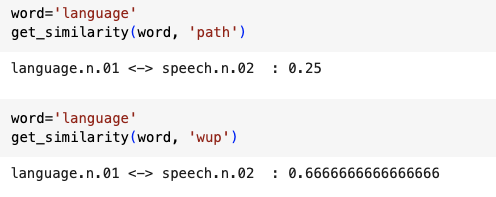

## E2. Calculate TF-IDF and search the Wiki page.

In this exercise, we will practise TF-IDF calculation using documents from [wikipedia library](https://pypi.org/project/wikipedia/), which is a Python library that makes it easy to access and parse data from Wikipedia. Based on the calculated TF-IDF, we then search the Wiki page for the word that has the top-1 TF-IDF value.

In [ ]:
## Install and import the wikipedia library
!pip install wikipedia
import wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=41f594f601aff68ac87109cef44245c160a47407d61b9ff597517367a1d0ca7a
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


In [ ]:
## Let's collect the page content from the following city related wiki pages as documents
## by using wikipedia.page(city).content, which returns a list of city related documents
cities_docs = ["Sydney","Chicago","Brisbane"]
documents = [wikipedia.page(city).content for city in cities_docs]

## Let's see what documents (pages) we got
documents

['Sydney is the capital city of the state of New South Wales and the most populous city in Australia. Located on Australia\'s east coast, the metropolis surrounds Sydney Harbour and extends about 80 km (50 mi) from the Pacific Ocean in the east to the Blue Mountains in the west, and about 80 km (50 mi) from Ku-ring-gai Chase National Park and the Hawkesbury River in the north and north-west, to the Royal National Park and Macarthur in the south and south-west. Greater Sydney consists of 658 suburbs, spread across 33 local government areas. Residents of the city are colloquially known as "Sydneysiders". The estimated population in June 2024 was 5,557,233, which is about 66% of the state\'s population. The city\'s nicknames include the Emerald City and the Harbour City.\nThere is evidence that Aboriginal Australians inhabited the Greater Sydney region at least 30,000 years ago, and their engravings and cultural sites are common. The traditional custodians of the land on which modern Sydn

In [ ]:
print(f"Total documents: {len(documents)}")

Total documents: 3


### Complete this section (Modify this section only)


Please fill in the following function(s) with code body:

Pass the (list of) documents provided above into the function as input. In the function, you may:
  
*   process the documents (e.g. tokenization) - provided in the sample code above. **Please add three additional stop words: sydney, chicago and brisbane.**
*   calculate the TF-IDF values for each unique word ([Counter](https://docs.python.org/3/library/collections.html#collections.Counter) can be a one of the good choices).
*   sort the words based on the TF-IDF values and get the word with the highest TF-IDF value based on the sorting result. (Using Python built-in function [sorted](https://docs.python.org/3/howto/sorting.html) might be helpful for sorting)
*   search the wiki page for this word and print out the page content (Refer to how we search and retrieve the wiki page content for the city documents)


In [ ]:
## Import packages:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

import re
import numpy as np
from collections import Counter
import math

nltk.download('stopwords')
from nltk.corpus import stopwords as sw

## TF-IDF-oriented function:
def tfidf_wikisearch(documents):
  ## Write your function code body from here (** the following comments are only for instructional reference)

  # Add the three additional stop words, you can also do it out of this function
  # append每次只能添加一个元素，extend可以添加多个
  sww = sw.words()
  sww.extend(cities_docs)

  # process the document
  # 清洗每一篇文档
  tokenized_docs = [] # 要将每一篇文档作为列表处理

  # 去除标点符号，转换为小写，标记每个term，去除已有文档中上的
  for doc in documents:
    clean_doc = re.sub(r'[^\w\s]','',doc)
    tokenized_doc = word_tokenize(clean_doc) #标记每个单词
    lower_tokens = [t.lower() for t in tokenized_doc]
    tokenized_doc = [w for w in lower_tokens if not w in sww]
    tokenized_docs.append(tokenized_doc)

  # calculate the TF-IDF values for each unique words
  # 初始化
  tf_idf = {}
  DF = {}

  N = len(tokenized_docs)

  # TF-IDF[(doc_id, term)],明确每一份文档里面这个term的TF-IDF
  doc_id = 0

  # 计算DF：每个term在每个文件中出现的次数
  for tokenized_doc in tokenized_docs:
    # get each unique word in the doc - and count the number of occurrences in the document
    for term in np.unique(tokenized_doc):
        try:
            DF[term] +=1
        except:
            DF[term] =1

  # 计算tf-idf
  for tokenized_doc in tokenized_docs:
    # 初始化counter，计算term
    counter = Counter(tokenized_doc)
    total_num_words = len(tokenized_doc)
    for term in np.unique(tokenized_doc):
      tf = counter[term]/ total_num_words
      df = DF[term]
      idf = math.log(N/(df+1))+1
      tf_idf[doc_id, term] = tf*idf

    doc_id += 1

  # sorting the words based on the TF-IDF valuse and get the word with top-1 TF-IDF value
  dict_exmaple = tf_idf
  sorted_dict = sorted(dict_exmaple.items(), key=lambda x: x[1], reverse=True)

  (top_doc_id, top_term), score = sorted_dict[0] # sorted_dict[0]是((doc_id, term), score)

  # search the wiki page for this word and print out the page content
  top_value = [wikipedia.page(top_term).content]
  wikipedia.page(top_term)

  print (sorted_dict)
  print("Total docs in documents: ", N)
  print("\nThe word with top-1 TF-IDF value is:", top_term)
  print("\nThe retrieved wiki page content:")
  print("="*60)
  print(wikipedia.page(top_term).content[:1500])  # 控制输出长度，防止太长
  print("="*60)




# Call the funtion, the execution print out log should be kept for submission
tfidf_wikisearch(documents)



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[((1, np.str_('chicago')), 0.06632571929710847), ((2, np.str_('brisbane')), 0.05748136965126874), ((0, np.str_('sydney')), 0.04236419542193372), ((2, np.str_('queensland')), 0.014411841080238899), ((1, np.str_('city')), 0.012977452121323828), ((1, np.str_('chicagos')), 0.010313382625287644), ((2, np.str_('city')), 0.008971025574159602), ((0, np.str_('city')), 0.008679879085259018), ((2, np.str_('moreton')), 0.008576585313046446), ((0, np.str_('sydneys')), 0.007362646050902581), ((2, np.str_('brisbanes')), 0.007299221543018252), ((1, np.str_('illinois')), 0.007112677672612168), ((0, np.str_('australia')), 0.00592187677941009), ((2, np.str_('south')), 0.005826542383217061), ((0, np.str_('harbour')), 0.005762070822445498), ((2, np.str_('area')), 0.005641572783749853), ((0, np.str_('south')), 0.0055161848392300305), ((0, np.str_('wales')), 0.005466347796378545), ((1, np.str_('side')), 0.005440283400809717), ((0, np.str_('australian')), 0.005352465550620658), ((2, np.str_('bay')), 0.0053232

###**E2 Sample output**

The following is **the sample output for E2** - **Your top1 TF-IDF word could be different from the following because of the wikipedia page changes.** Please just only check the output **format**, i.e. your output DO NOT need to be exactly the same.

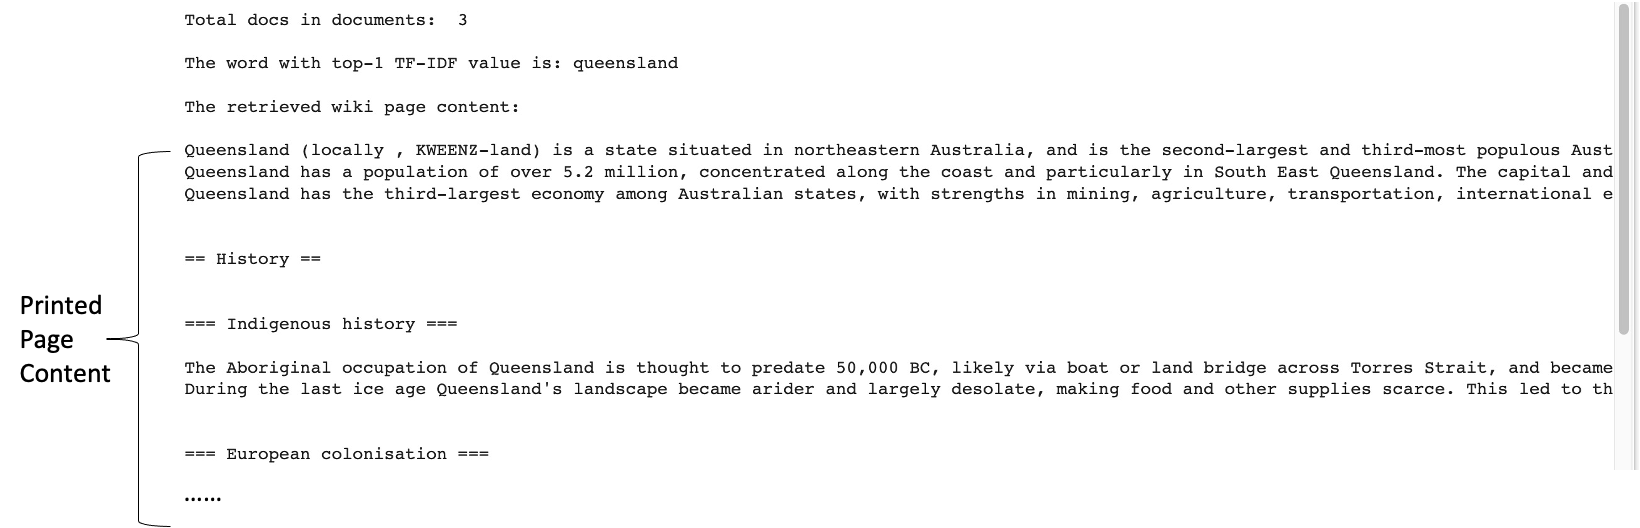